# SYRIATEL CUSTOMER CHURN

## Business problem

Customer churn is the name for when a subscriber or a regular customer cancels his subscription or stops doing business with a company. Therefore, the churn rate is the measure of how many people stopped being a client of the company ina determined time period.
With the evolution of machine learning algorithms and data science, churn prediction has become a very important part of every company's strategy. If a company can accurately predict that a customer is about to churn, it can then act to prevent the churn. Usually working to keep a client is cheaper than working to get a new client.<br>
Customer churn is a major problem and one of the most important concerns for large companies. Due to the direct effect on the revenues of the companies, especially in the telecom field, companies are seeking to develop means to predict potential customer to churn. Therefore, finding factors that increase customer churn is important to take necessary actions to reduce this churn. The main contribution of our work is to develop a churn prediction model which assists telecom operators to predict customers who are most likely subject to churn. <br>

Churn rate, sometimes known as attrition rate, is the rate at which customers stop doing business with a company over a given period of time. Churn may also apply to the number of subscribers who cancel or don't renew a subscription. The higher your churn rate, the more customers stop buying from your business.<br>
The goal of this project was to identify user’s who are more likely to churn than not before they actually do. This is to allow Syriatel to intervene with the customer to help navigate them through any issues that may cause them to stop paying for the service.

## Objectives

To build a machine learning model that can accurately predict customers  who will churn based on the information available in the dataset.

### Success criteria

The most important metric that will be used to evaluate the performance of the classification algorithm is recall. Recall involves the rate at which the model correctly predicts customers who are going to churn. The end goal is to minimize false negatives. Failure to identify a customer who is about to churn is more costly to the business, than wrongly classifying a non-churning customer. A successful model should have a recall of at least 85%.<br>
However, if the model predicts that all customers will churn, it would have a perfect recall. This would not be useful to the business since it is clear that not all customers will churn. It will be important to keep track of precision and accuracy as secondary metrics.

### Load and understand the data

In [1]:
# install imblearn library
!pip install imbalanced-learn

In [2]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer


%matplotlib inline

In [3]:
# load and preview dataset
customer_df = pd.read_csv('Data/Customer_churn.csv')
customer_df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [4]:
# number of rows and columns of house_data
print(f'customer_df has {customer_df.shape[0]} rows and {customer_df.shape[1]} columns')

customer_df has 3333 rows and 21 columns


In [5]:
# summary of the dataframe
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

## Data Cleaning

The customer's phone number is the unique identifier. There should be no duplicate phone numbers.

In [6]:
# check for duplicates using the phone number
customer_df.duplicated(subset='phone number').value_counts()

False    3333
dtype: int64

In [7]:
# check for missing values
customer_df.isna().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

The dataframe has no duplicates and no missing values.

In [8]:
customer_df['area code'].dtype

dtype('int64')

No mathemathical computation can be done on the area code, so it is best to convert it to an object data type.

In [9]:
# convert area code from integer to string
customer_df['area code'] = customer_df['area code'].astype(object)
customer_df['area code'].dtype

dtype('O')

## Exploratory data analysis

### Univariate anaysis

churn is the target variable for this classification project. 

In [10]:
# unique values of the target variable
customer_df['churn'].value_counts()

False    2850
True      483
Name: churn, dtype: int64

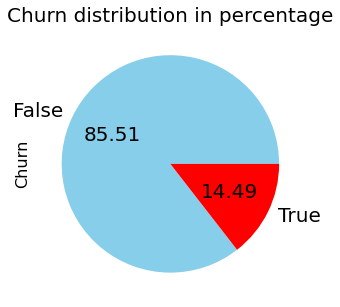

In [11]:
# pie chart showing distribution of target variable
fig, ax = plt.subplots(figsize=(10, 5))

customer_df.groupby('churn').size().plot(kind='pie', autopct='%.2f', textprops={'fontsize': 20}, colors=['skyblue', 'red'], ax=ax)
ax.set_ylabel('Churn', fontsize=16)
ax.set_title('Churn distribution in percentage', fontsize=20);

There is a class imbalance problem since the target class has an uneven distribution of observations. 85.51% of the data belongs to the False class while 14.49% belongs to the true class.

The dataset has both categorical and numeric features. 

In [12]:
# summary statistics
customer_df.describe()

,account length,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


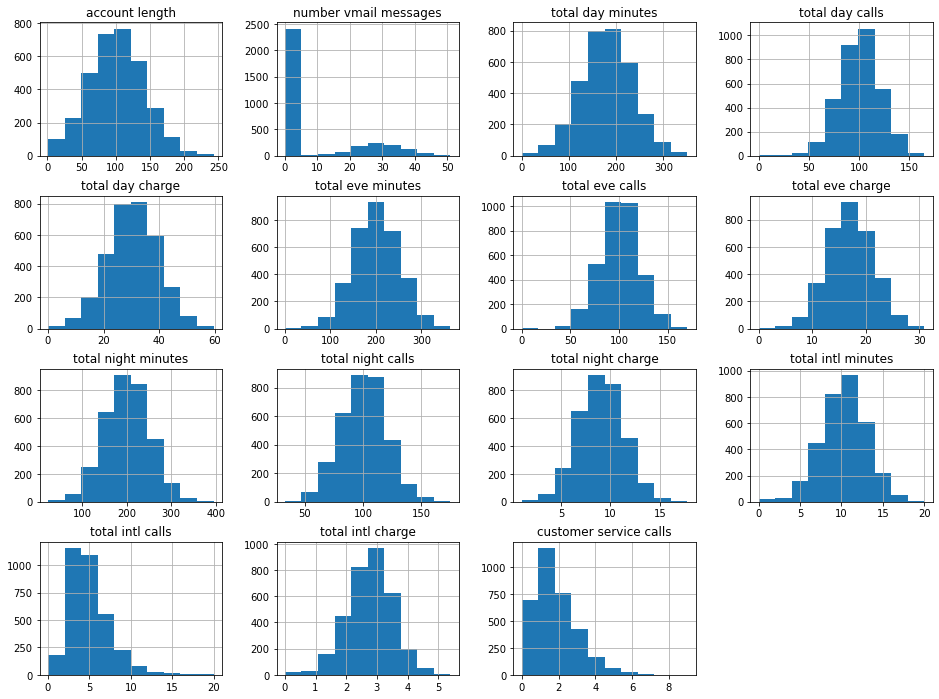

In [14]:
# distribution of features
customer_df.drop(columns='churn').hist(figsize=(16,12));

The scaling differs across the features, and a few of the features are not normally distributed.  The features will therefore have to be scaled and normalized.

In [15]:
# unique values of categorical features
categorical_cols = customer_df.drop('phone number', axis=1).select_dtypes(include='object').columns
for col in categorical_cols:
    print(col.upper())
    print(customer_df[col].unique())
    print('****************************************************** \n')

STATE
['KS' 'OH' 'NJ' 'OK' 'AL' 'MA' 'MO' 'LA' 'WV' 'IN' 'RI' 'IA' 'MT' 'NY'
 'ID' 'VT' 'VA' 'TX' 'FL' 'CO' 'AZ' 'SC' 'NE' 'WY' 'HI' 'IL' 'NH' 'GA'
 'AK' 'MD' 'AR' 'WI' 'OR' 'MI' 'DE' 'UT' 'CA' 'MN' 'SD' 'NC' 'WA' 'NM'
 'NV' 'DC' 'KY' 'ME' 'MS' 'TN' 'PA' 'CT' 'ND']
****************************************************** 

AREA CODE
[415 408 510]
****************************************************** 

INTERNATIONAL PLAN
['no' 'yes']
****************************************************** 

VOICE MAIL PLAN
['yes' 'no']
****************************************************** 



### Multivariate analysis

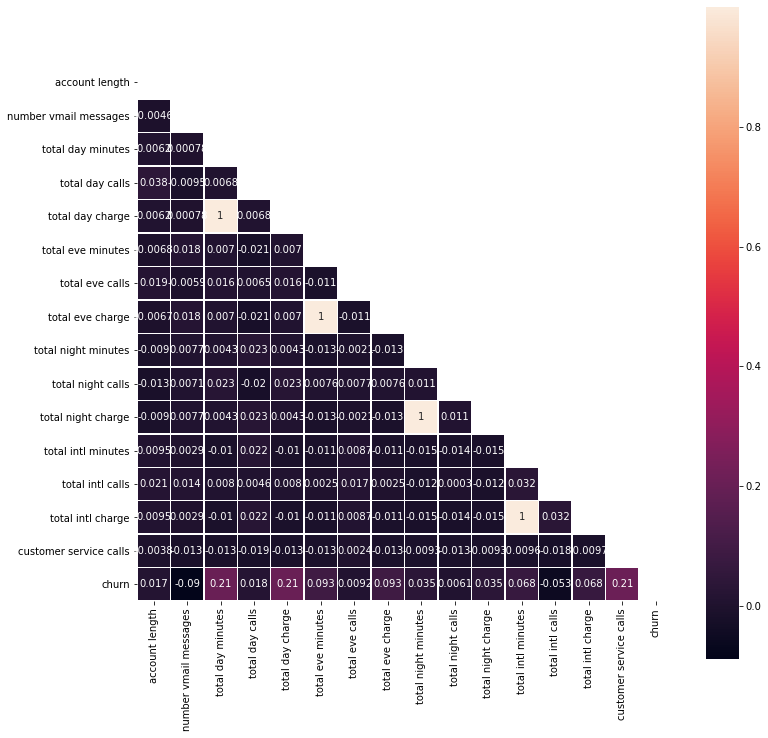

In [16]:
#using a heatmap to show correlation
fig, ax = plt.subplots(figsize=(12,12))
mask = np.triu(np.ones_like(customer_df.corr(), dtype=bool))
sns.heatmap(customer_df.corr(), linewidths=0.5, mask=mask, square=True, ax=ax, annot=True);

- There is a very low correlation between most features. <br>
- However, there is a perfect positive correlation between total evening charge and total evening minutes, total day charge and total day minutes, total night charge and total night minutes, and total international charge and total international minutes. This is expected since the charge of a call depends on the length of the call in minutes. One correlated variable will have to be dropped from each pair to handle multicollinearity. <br>
- total day minutes, total day charge and customer service calls have a weak positive correlation with churn. <br>
- The other features have a negligible correlation with churn, approximately 0.

## Data preparation for Machine Learning

### Multicollinearity of features

In [17]:
# pairs with collinearity > 0.75
df = customer_df.corr().abs().stack().reset_index().sort_values(0, ascending=False)
df['pairs'] = list(zip(df.level_0, df.level_1))
df.set_index(['pairs'], inplace = True)
df.drop(columns=['level_1', 'level_0'], inplace = True)
df.columns = ['cc']
df.drop_duplicates(inplace=True)
df[(df.cc>.75) & (df.cc<1)]

,cc
pairs,
"(total day charge, total day minutes)",1.000000
"(total eve charge, total eve minutes)",1.000000
"(total night minutes, total night charge)",0.999999
"(total intl charge, total intl minutes)",0.999993


In [18]:
# drop some columns to address the collinearity
customer_df = customer_df.drop(columns = ['total day charge', 'total eve charge', 'total night charge', 'total intl charge'])
customer_df.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total eve minutes',
       'total eve calls', 'total night minutes', 'total night calls',
       'total intl minutes', 'total intl calls', 'customer service calls',
       'churn'],
      dtype='object')

### Train-test split

In [19]:
#select predictor and target variables
y = customer_df['churn']
X = customer_df.drop(columns=['churn', 'phone number'])

# split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
# preview of X_train
X_train.head()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total eve minutes,total eve calls,total night minutes,total night calls,total intl minutes,total intl calls,customer service calls
817,UT,243,510,no,no,0,95.5,92,163.7,63,264.2,118,6.6,6,2
1373,SC,108,415,no,no,0,112.0,105,193.7,110,208.9,93,4.1,4,4
679,TX,75,415,yes,no,0,222.4,78,327.0,111,208.0,104,8.7,9,1
56,CO,141,415,no,no,0,126.9,98,180.0,62,140.8,128,8.0,2,1
1993,IN,86,510,no,no,0,216.3,96,266.3,77,214.0,110,4.5,3,0


### Transform categorical variables

In [21]:
# Creating dummy variables for the categorical columns
X_train = pd.get_dummies(X_train,drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)
X_train.head(3)

,account length,number vmail messages,total day minutes,total day calls,total eve minutes,total eve calls,total night minutes,total night calls,total intl minutes,total intl calls,...,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,area code_415,area code_510,international plan_yes,voice mail plan_yes
817,243,0,95.5,92,163.7,63,264.2,118,6.6,6,...,0,0,0,0,0,0,0,1,0,0
1373,108,0,112.0,105,193.7,110,208.9,93,4.1,4,...,0,0,0,0,0,0,1,0,0,0
679,75,0,222.4,78,327.0,111,208.0,104,8.7,9,...,0,0,0,0,0,0,1,0,1,0


### SMOTE

SMOTE is used to handle class imbalance problems by oversampling the minority class with replacement

In [22]:
# Fit SMOTE to training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train) 

# Preview synthetic sample class distribution
print(pd.Series(y_train_resampled).value_counts()) 

True     2284
False    2284
Name: churn, dtype: int64


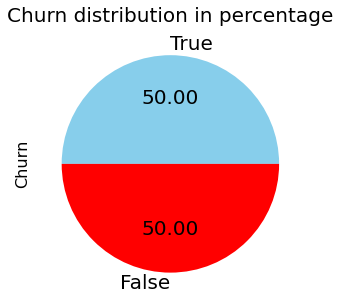

In [23]:
# pie chart showing distribution of target variable
fig, ax = plt.subplots(figsize=(10, 5))

y_train_resampled.value_counts().plot(kind='pie', autopct='%.2f', textprops={'fontsize': 20}, colors=['skyblue', 'red'], ax=ax)
ax.set_ylabel('Churn', fontsize=16)
ax.set_title('Churn distribution in percentage', fontsize=20);

In [24]:
# SMOTE not applied to test data
y_test.value_counts()

False    566
True     101
Name: churn, dtype: int64

The distribution of the churn classes is now balanced. SMOTE was applied on the training sets only. This ensured that an accurate gauge can be made on the model's performance by using a raw test sample that has not been oversampled or undersampled.

## Modeling

### Logistic regression

Logistic regression model will be used as the baseline model. ‘liblinear’ is used as the solver since the size of the dataset is small. C is set to a very large number to reduce the strength of regularization. 

In [25]:
# create a pipeline
pipe_log = Pipeline(steps=[('scale', StandardScaler()), ('logreg', LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear'))])
pipe_log.fit(X_train_resampled, y_train_resampled)

Pipeline(steps=[('scale', StandardScaler()),
                ('logreg',
                 LogisticRegression(C=1000000000000.0, fit_intercept=False,
                                    solver='liblinear'))])

In [26]:
# function to evaluate the performance of the model
def evaluate(model, X_test, y_test):
    y_preds = model.predict(X_test)
    print('Recall_score: ', recall_score(y_test, y_preds))
    print('precision_score: ', precision_score(y_test, y_preds))
    print('Accuracy_score: ', accuracy_score(y_test, y_preds))
    cm = confusion_matrix(y_test, y_preds, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot();

Recall_score:  0.19801980198019803
precision_score:  0.43478260869565216
Accuracy_score:  0.8395802098950524


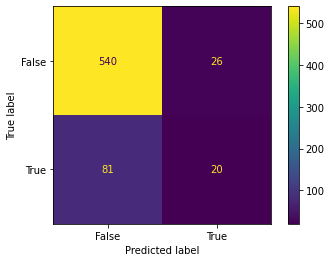

In [27]:
# evaluate the performance of the model
evaluate(pipe_log, X_test, y_test)

Despite the model having a high accuracy, it has a very low recall score. The model is thus performing poorly due to the large number of false negatives.

### Decision Tree model

In [28]:
# Create a pipeline
pipe_dt = Pipeline(steps=[('scale', StandardScaler()), ('clf', DecisionTreeClassifier(criterion='entropy', random_state=42))])
pipe_dt.fit(X_train_resampled, y_train_resampled)

Pipeline(steps=[('scale', StandardScaler()),
                ('clf',
                 DecisionTreeClassifier(criterion='entropy', random_state=42))])

Recall_score:  0.8118811881188119
precision_score:  0.47674418604651164
Accuracy_score:  0.8365817091454273


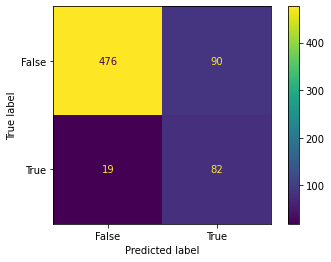

In [29]:
# evaluate the performance of the model
evaluate(pipe_dt, X_test, y_test)

The decision tree model has a higher recall score compared to the baseline model. The model's performance has increased by 59%.

In [30]:
# checking the pipeline steps to note model position
pipe_dt.steps

[('scale', StandardScaler()),
 ('clf', DecisionTreeClassifier(criterion='entropy', random_state=42))]

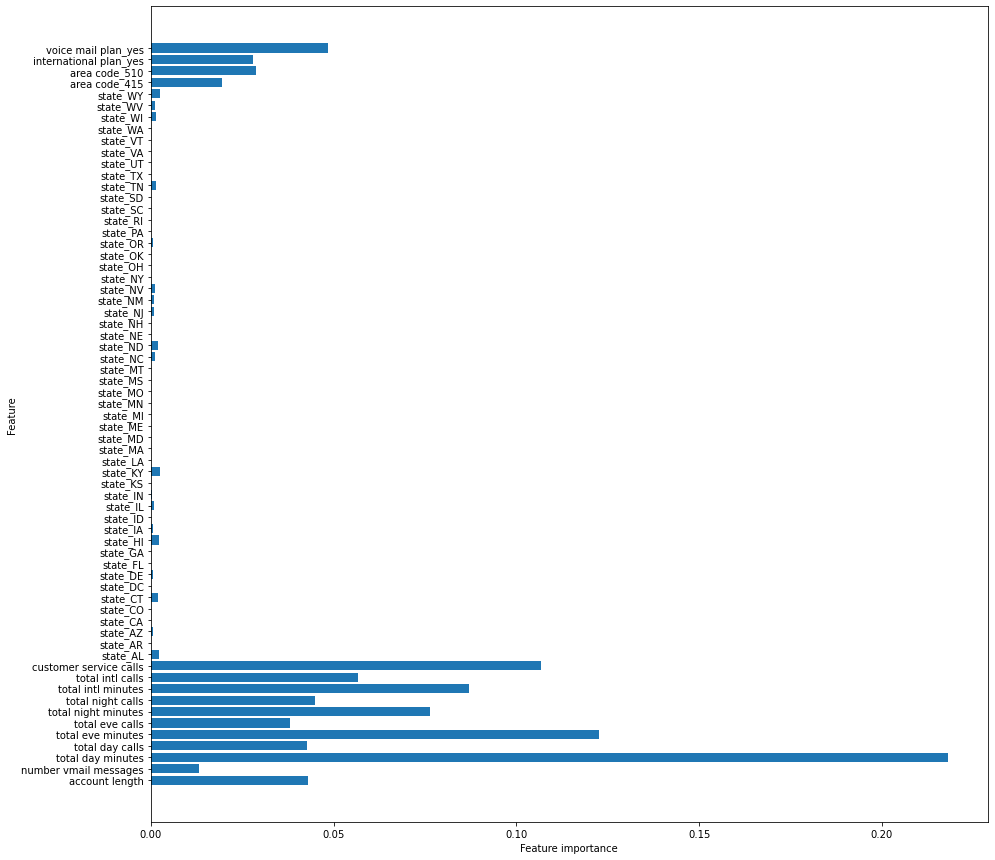

In [31]:
# function to plot feature importances
def plot_feature_importances(pipe):
    model = pipe.steps[1][1]
    plt.figure(figsize=(15,15))
    plt.barh(X_train_resampled.columns, model.feature_importances_, align='center') 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

plot_feature_importances(pipe_dt)

total day minutes is an important factor in determining whether a customer would churn or not, followed by total evening minutes and customer service calls. State has the least importance in predicting customer churn.

#### Hyperparameter tuning of the decision tree model

In [37]:
# hyperparameter tuning using GridSearchCV
params_dt = {'clf__criterion': ['gini', 'entropy'],
             'clf__max_depth': [None, 2, 4, 6, 8],
             'clf__min_samples_split' : [2, 3, 5, 7],
             'clf__min_samples_leaf': [2, 5, 7, 10],
             'clf__max_features' : [11, 13, 15]
}

gridsearch_dt = GridSearchCV(pipe_dt, params_dt, cv=4, scoring='recall')
gridsearch_dt.fit(X_train_resampled, y_train_resampled)

GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('clf',
                                        DecisionTreeClassifier(criterion='entropy',
                                                               random_state=42))]),
             param_grid={'clf__criterion': ['gini', 'entropy'],
                         'clf__max_depth': [None, 2, 4, 6, 8],
                         'clf__max_features': [11, 13, 15],
                         'clf__min_samples_leaf': [2, 5, 7, 10],
                         'clf__min_samples_split': [2, 3, 5, 7]},
             scoring='recall')

In [38]:
# parameters that gave the best result
print(f'Optimal parameters: {gridsearch_dt.best_params_}')

# Mean cross-validated score of the best_estimator
print(f'Training recall: {gridsearch_dt.best_score_}')

# performance on test data using score defined by scoring, recall 
print(f'Recall score on test data: {gridsearch_dt.score(X_test, y_test)}')

Optimal parameters: {'clf__criterion': 'gini', 'clf__max_depth': 2, 'clf__max_features': 15, 'clf__min_samples_leaf': 2, 'clf__min_samples_split': 2}
Training recall: 0.9260070052539404


'Recall score on test data: 0.8316831683168316'

Recall_score:  0.8316831683168316
precision_score:  0.17872340425531916
Accuracy_score:  0.39580209895052476


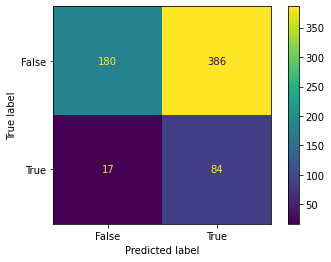

In [39]:
# evaluate the performance of the model
evaluate(gridsearch_dt, X_test, y_test)

On tuning the model, the model is performing better based on the recall score. However, the accuracy and precision score is very low. There are many false positives.

### Random forest

Random forest is used since it is naturally resistant to noise and variance

In [62]:
# create a pipeline
pipe_rf = Pipeline(steps=[('scale', StandardScaler()), ('rf', RandomForestClassifier(random_state=42))])
pipe_rf.fit(X_train_resampled, y_train_resampled)

Pipeline(steps=[('scale', StandardScaler()),
                ('rf', RandomForestClassifier(random_state=42))])

Recall_score:  0.693069306930693
precision_score:  0.7070707070707071
Accuracy_score:  0.9100449775112444


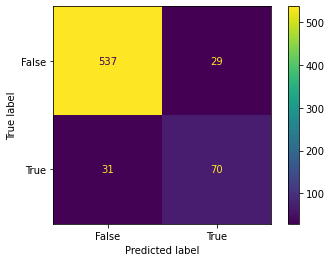

In [63]:
# evaluate model performance
evaluate(pipe_rf, X_test, y_test)

The random forest model has a higher recall compared to the baseline logistic regression model, but a lower recall compared to the decision tree model. It is the model with the highest accuracy so far.

#### Hyperparameter tuning of the random forest model

In [77]:
# hyperparameter tuning using GridSearchCV
params_rf = {'rf__n_estimators': [80, 100],
             'rf__criterion': ['gini', 'entropy'],
             'rf__max_depth': [ None, 5,  15,  25,  35,  45, 55],
             'rf__min_samples_split': [2, 3, 5, 7],
             'rf__min_samples_leaf': [2, 5, 7, 10],
             'rf__max_features': [11, 13, 15]
}

gridsearch_rf = GridSearchCV(pipe_rf, params_rf, cv=4, scoring='recall')
gridsearch_rf.fit(X_train_resampled, y_train_resampled)


GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('rf',
                                        RandomForestClassifier(random_state=42))]),
             param_grid={'rf__criterion': ['gini', 'entropy'],
                         'rf__max_depth': [None, 5, 15, 25, 35, 45, 55],
                         'rf__max_features': [11, 13, 15],
                         'rf__min_samples_leaf': [2, 5, 7, 10],
                         'rf__min_samples_split': [2, 3, 5, 7],
                         'rf__n_estimators': [80, 100]},
             scoring='recall')

In [78]:
# parameters that gave the best result
print(f'Optimal parameters: {gridsearch_rf.best_params_}')

# Mean cross-validated score of the best_estimator
print(f'Training recall: {gridsearch_rf.best_score_}')

Optimal parameters: {'rf__criterion': 'entropy', 'rf__max_depth': None, 'rf__max_features': 15, 'rf__min_samples_leaf': 2, 'rf__min_samples_split': 2, 'rf__n_estimators': 80}
Training recall: 0.9128721541155868
Recall score on test data: 0.7326732673267327


Recall_score:  0.7326732673267327
precision_score:  0.7326732673267327
Accuracy_score:  0.9190404797601199


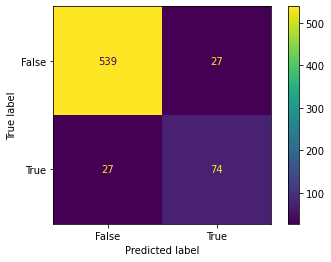

In [80]:
# evaluate the performance of the model
evaluate(gridsearch_rf, X_test, y_test)

### XGBoost

In [33]:
# create a pipeline
pipe_xgb = Pipeline(steps=[('scale', StandardScaler()), ('xgb', XGBClassifier(random_state=42))])
pipe_xgb.fit(X_train_resampled, y_train_resampled)

Pipeline(steps=[('scale', StandardScaler()),
                ('xgb',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
       

Recall_score:  0.801980198019802
precision_score:  0.84375
Accuracy_score:  0.9475262368815592


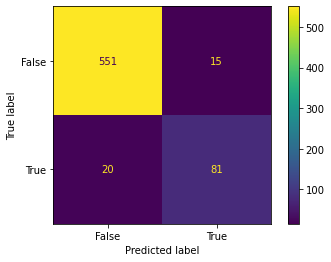

In [35]:
# evaluate model performance
evaluate(pipe_xgb, X_test, y_test)

#### Hyperparameter tuning of XGBoost model

In [43]:
# hyperparameter tuning using GridSearchCV
params_xgb = {
    'xgb__learning_rate': [0.1, 0.2, 0.3],
    'xgb__max_depth': [5, 7, 9, 11, 13],
    'xgb__min_child_weight': [1, 2, 3, 4, 5, 6],
    'xgb__subsample': [0.5, 0.6, 0.7, 0.9],
    'xgb__tree_method': ['hist']
}

gridsearch_xgb = GridSearchCV(pipe_xgb, params_xgb, cv=5, scoring='recall')
gridsearch_xgb.fit(X_train_resampled, y_train_resampled)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('xgb',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      early_stopping_rounds=None,
                                                      enable_categorical=False,
                                                      eval_metric=None,
                                                      feature_types=None,
                                                      gamma=None, gpu_id=None,
                                      

In [44]:
# parameters that gave the best result
print(f'Optimal parameters: {gridsearch_xgb.best_params_}')

# Mean cross-validated score of the best_estimator
print(f'Training recall: {gridsearch_xgb.best_score_}')

# performance on test data using score defined by scoring, recall 
print(f'Recall score on test data: {gridsearch_xgb.score(X_test, y_test)}')

Optimal parameters: {'xgb__learning_rate': 0.3, 'xgb__max_depth': 11, 'xgb__min_child_weight': 2, 'xgb__subsample': 0.9, 'xgb__tree_method': 'hist'}
Training recall: 0.9430966639794235
Recall score on test data: 0.801980198019802


Recall_score:  0.801980198019802
precision_score:  0.7941176470588235
Accuracy_score:  0.9385307346326837


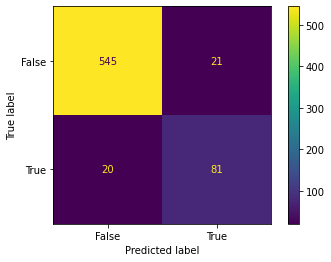

In [45]:
# evaluate the performance of the model
evaluate(gridsearch_xgb, X_test, y_test)